In [2]:
import ByteTrack 
import visualisation
import matplotlib.pyplot as plt

plt.style.use('classic')

### Paths

### Create nuscenes object to get tokens and ground truth

In [ ]:
DETECTION_PATH = 'your_path_to_detection_results.json'

In [3]:
# you can cange detection_path to use other detector ouput make sure to be on the same eval_split
nusc, gt, pred = ByteTrack.load_data(dataset = "trainval", detection_path = DETECTION_PATH, eval_split = "val", verbose = False)

Loaded results from data/detection_megvii/megvii_val.json. Found detections for 6019 samples.
Loading annotations for val split from nuScenes version: v1.0-trainval


100%|██████████| 6019/6019 [00:09<00:00, 658.07it/s] 


Loaded ground truth annotations for 6019 samples.


In [4]:
#get the sample tokens in the correct order for each scene and make sure we have the same for gt and pred
token_list = ByteTrack.get_sample_token_sequence(nusc)
val_token_list = ByteTrack.get_common_tokens(token_list, pred)
print(f"there are {len(val_token_list)} samples in the validation set")

there are 150 samples in the validation set


## Getting the history by running ByteTrack on a particular scene

Here we will re-run ByteTrack on a particular scene in order to get the history of the scene and the infos associatied (the status of the "found" flag for example)

In [48]:
scene_index = 124 # has to be between 0 and len(val_token_list)-1
history, _ = ByteTrack.ByteTrack(val_token_list[scene_index], pred, 0, confidence_threshold=0.4, hung_thresh=0.6, verbose = False) # run bytettrack on the desired scene

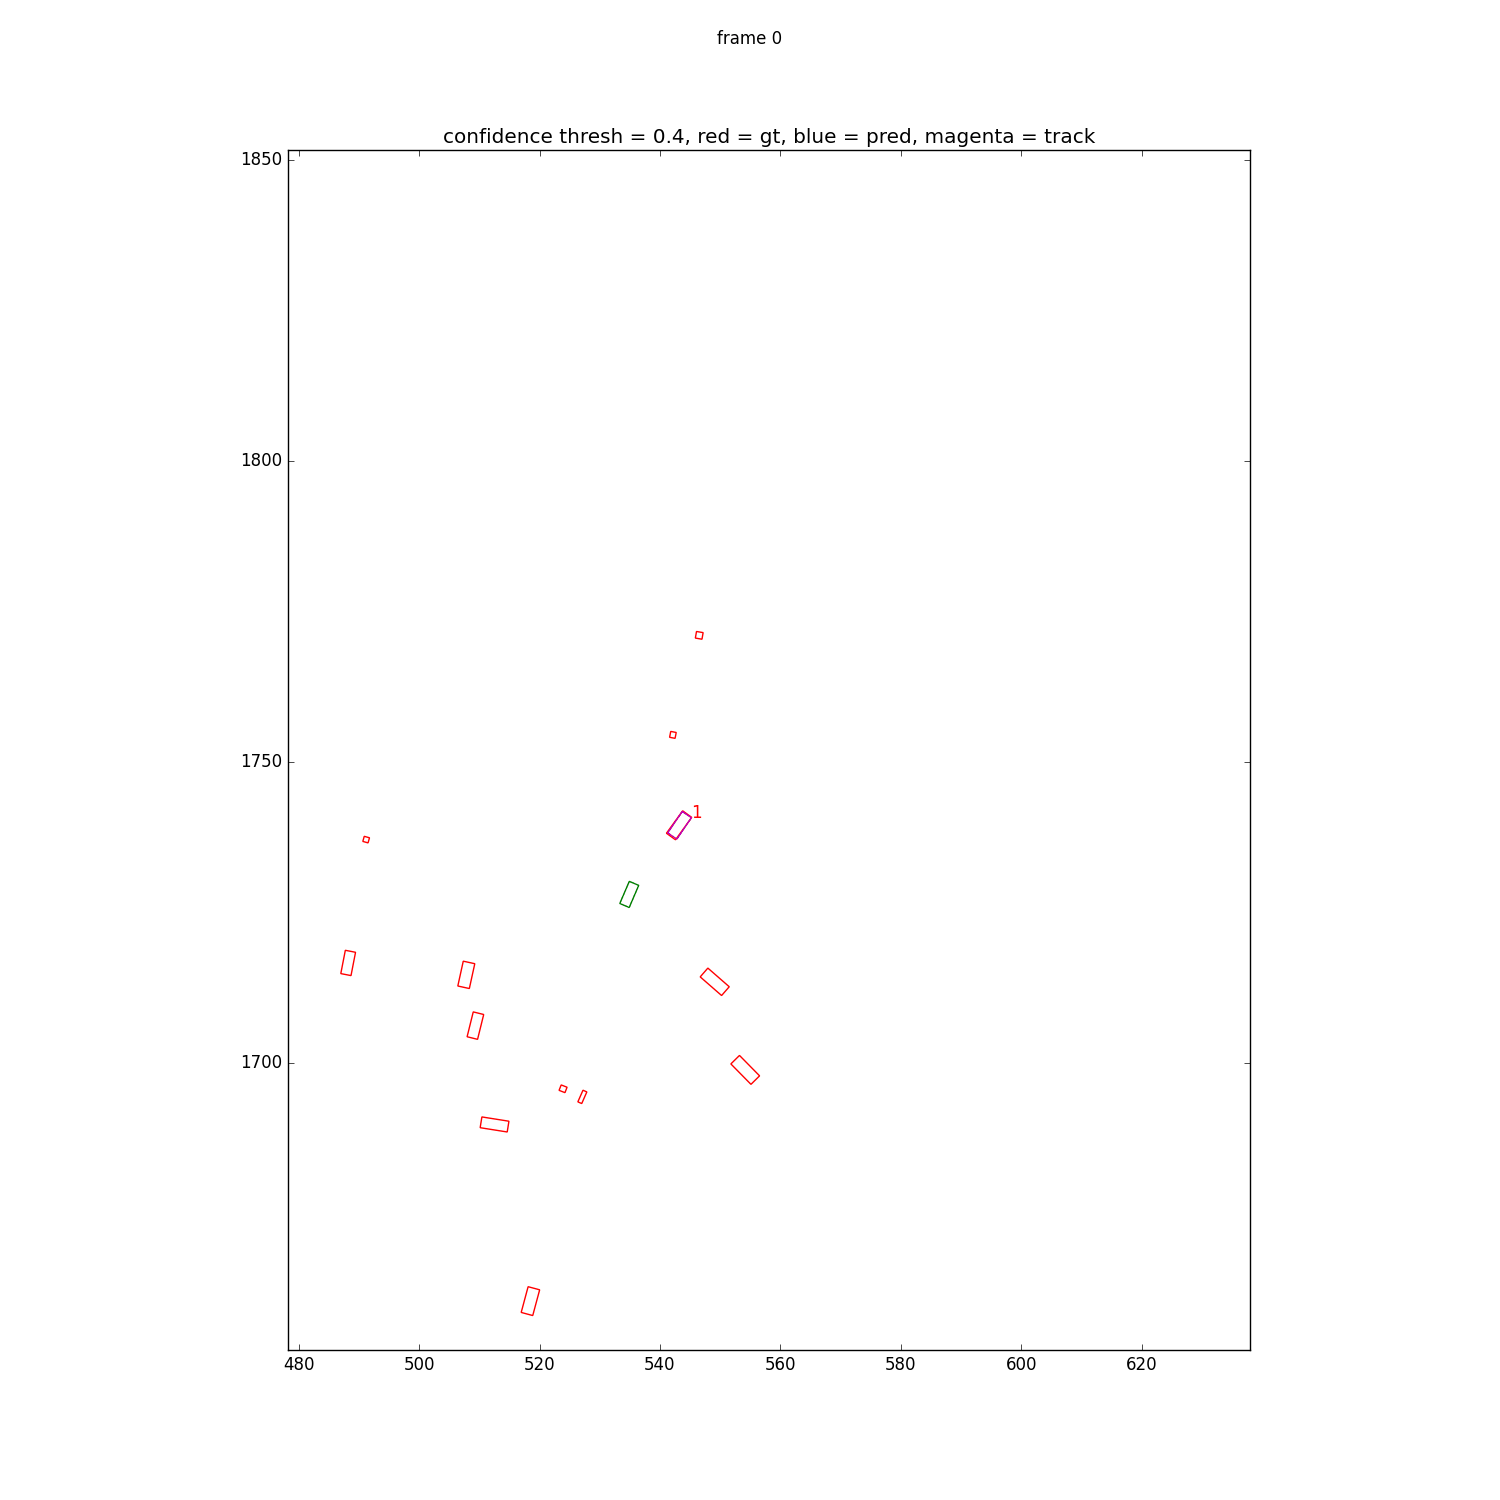

In [49]:
tokens = val_token_list[scene_index]
visualisation.create_gif(tokens, nusc, gt, pred, history, 0.4, plot_gt=True, plot_pred=False, plot_track=True)

# display the gif in the notebook
from IPython.display import Image
Image(filename='plots.gif')